##1.Preparation and install dependency

In [1]:
!pip install opencv-python==3.4.2.17
!pip install opencv-contrib-python==3.4.2.17

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 25.0 MB 48.1 MB/s 
  Attempting uninstall: opencv-python
    Found existing installation: opencv-python 4.1.2.30
    Uninstalling opencv-python-4.1.2.30:
      Successfully uninstalled opencv-python-4.1.2.30
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 30.6 MB 1.3 MB/s 
  Attempting uninstall: opencv-contrib-python
    Found existing installation: opencv-contrib-python 4.1.2.30
    Uninstalling opencv-contrib-python-4.1.2.30:
      Successfully uninstalled opencv-contrib-python-4.1.2.3

In [2]:
import cv2
import time
from google.colab.patches import cv2_imshow

In [3]:
%cd /content
from google.colab import drive
drive.mount('/content/gdrive')

/content
Mounted at /content/gdrive


In [4]:
!ln -s /content/gdrive/Shareddrives/UAV/lab11 /lab11
%cd /content/

/content


##INSTRUCTION

上面的block都按過一輪之後，只要沒有斷線過，下方block(左邊打開目錄後，編號2到5都是)都可以直接按執行那個block。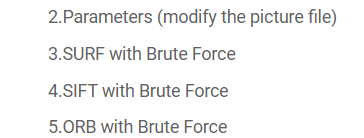


先執行下面的Paramters Setting(圖片位置、是否要限制畫線的數量、限制數目)

接著可以執行
3.SURF with Brute Force
4.SIFT with Brute Force
5.ORB with Brute Force

這些會在該block下面產生運算時間，以及兩張圖片(before ratio&after ratio)。
圖片會儲存在雲端裡，可以開分頁下載它，記得要下載後要改檔名，不然會搞混。

另外左邊可以找到檔案管理(如下圖)，可以在/gdrive/Shareddrives/lab11裡找到剛剛輸出的兩張圖片，直接點開可以在右邊顯示圖片。也可以在這個檔案管理內，用右鍵選直接下載(可能會很慢，建議直接開分頁進google雲端直接翻，記得按F5重整刷新一下)
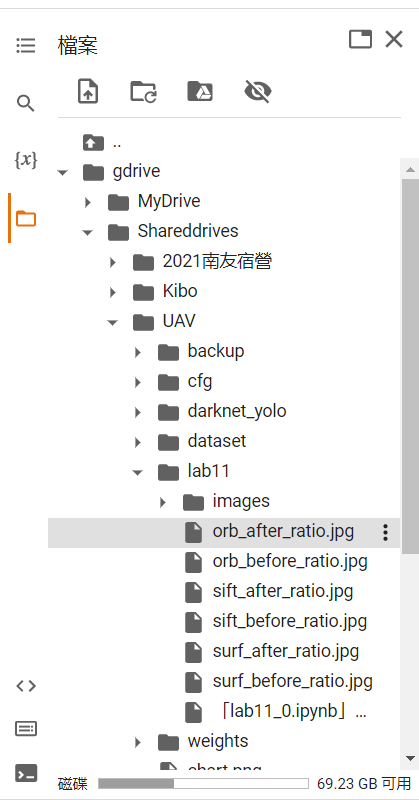


<font color=red size=6>注意執行完要存檔，要下載對的檔案。 
因為換圖片or條件後，就會把剛剛存上雲端的照片存檔洗掉了</font>


##2.Parameters (modify the picture file)

In [5]:
img0_addr = '/lab11/images/book_0.JPG'      #設定img0圖片位置
img1_addr = '/lab11/images/book_1.JPG'      #設定img1圖片位置


ENABLE_GRAY_SCALE = False             #控制是否要變成灰階
ENABLE_LIMIT_DRAWING_LINES_BEFORE_RATIO = False  #在ratio test前的SURF、SIFT、ORB結果是否要設置只顯示前n個(distance最大越前面)，
                           #若輸出pairs數量比限制小，則直接輸出目前的最大pairs數量 
limit_draw_lines_before_ratio_test = 25      #限制pairs輸出數量(before ratio test)
ENABLE_LIMIT_DRAWING_LINES_AFTER_RATIO = False   #在ratio test後的SURF、SIFT、ORB結果是否要設置只顯示前n個(distance最大越前面)，
                           #若輸出pairs數量比限制小，則直接輸出目前的最大pairs數量
limit_draw_lines_after_ratio_test = 25       #限制pairs輸出數量(after ratio test)

if ENABLE_GRAY_SCALE == True:
  img0 = cv2.imread(img0_addr,cv2.IMREAD_GRAYSCALE)
  img1 = cv2.imread(img1_addr,cv2.IMREAD_GRAYSCALE)
else:
  img0 = cv2.imread(img0_addr)
  img1 = cv2.imread(img1_addr)

##3.<font color=blue size=6>SURF with Brute Force</font>

SURF use time:0.7874186038970947 s
Brute Force matching use time:0.12535858154296875 s
below is before ratio test


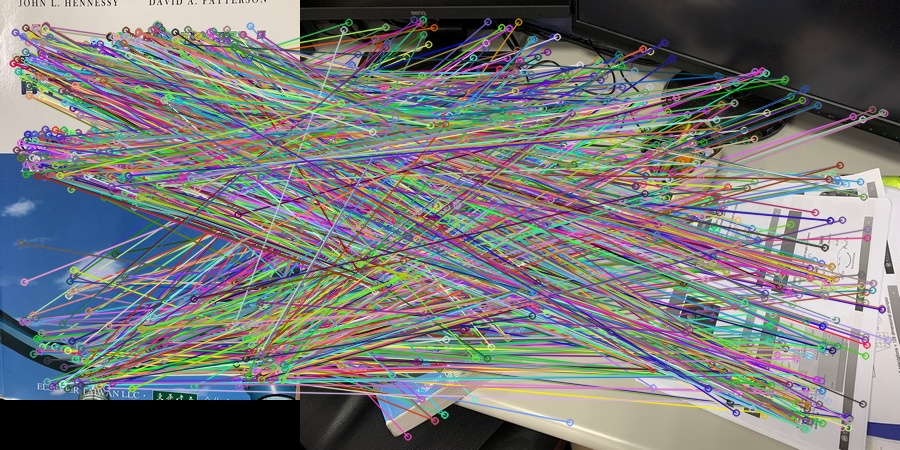

below is after ratio test


True

In [8]:
# Perform SURF feature detection and description.
t1 = time.time()
surf = cv2.xfeatures2d.SURF_create()
kp0, des0 = surf.detectAndCompute(img0, None)
kp1, des1 = surf.detectAndCompute(img1, None)
t2 = time.time()
# Perform brute-force KNN matching.
bf = cv2.BFMatcher()#cv2.NORM_HAMMING, crossCheck=False)
pairs_of_matches = bf.knnMatch(des0, des1, k=2)
t3 = time.time()

print('SURF use time:{} s'.format(t2-t1))
print('Brute Force matching use time:{} s'.format(t3-t2))

# Sort the pairs of matches by distance.
pairs_of_matches = sorted(pairs_of_matches, key=lambda x: x[0].distance)

# Set how many pair of matches will draw
if ENABLE_LIMIT_DRAWING_LINES_BEFORE_RATIO == True:
  limit_num = limit_draw_lines_before_ratio_test if (len(pairs_of_matches)>limit_draw_lines_before_ratio_test) else len(pairs_of_matches)
else:
  limit_num = len(pairs_of_matches)

# Draw the pairs of matches.(from best to worst)
img_pairs_of_matches = cv2.drawMatchesKnn(
    img0, kp0, img1, kp1, pairs_of_matches[:limit_num], img1,
    flags=cv2.DRAW_MATCHES_FLAGS_NOT_DRAW_SINGLE_POINTS)

# Show the pairs of matches.
print("below is before ratio test")
cv2_imshow(img_pairs_of_matches)
cv2.imwrite('/lab11/surf_before_ratio.jpg', img_pairs_of_matches)
# Apply the ratio test.
matches = [x[0] for x in pairs_of_matches
            if len(x) > 1 and x[0].distance < 0.8 * x[1].distance]

# Set how many pair of matches will draw(for ratio test)
if ENABLE_LIMIT_DRAWING_LINES_AFTER_RATIO == True:
  limit_num = limit_draw_lines_after_ratio_test if (len(matches)>limit_draw_lines_after_ratio_test) else len(matches)
else:
  limit_num = len(matches)


# Draw the pairs of matches.(from best to worst)(after ratio test)
img_matches = cv2.drawMatches(
    img0, kp0, img1, kp1, matches[:limit_num], img1,None,
        singlePointColor=(255, 0, 0),
        flags=0)

# Show the matches.
print("below is after ratio test")
cv2_imshow(img_matches)
cv2.imwrite('/lab11/surf_after_ratio.jpg', img_matches)

##4.<font color=blue size=6>SIFT with Brute Force</font>

SIFT use time:0.26412057876586914 s
Brute Force matching use time:0.04917454719543457 s
below is before ratio test


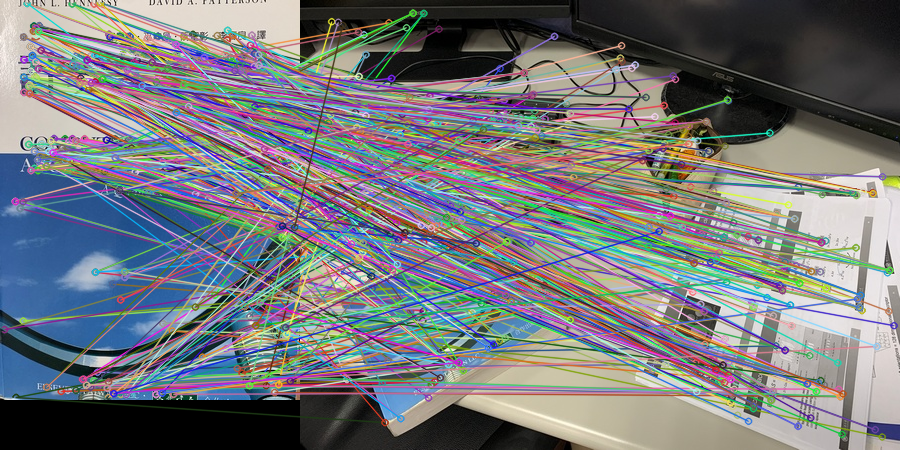

below is after ratio test


True

In [7]:
# Perform SIFT feature detection and description.
t1 = time.time()
sift = cv2.xfeatures2d.SIFT_create()
kp0, des0 = sift.detectAndCompute(img0, None)
kp1, des1 = sift.detectAndCompute(img1, None)
t2 = time.time()
# Perform brute-force KNN matching.
bf = cv2.BFMatcher()#cv2.NORM_HAMMING, crossCheck=False)
pairs_of_matches = bf.knnMatch(des0, des1, k=2)
t3 = time.time()

print('SIFT use time:{} s'.format(t2-t1))
print('Brute Force matching use time:{} s'.format(t3-t2))

# Sort the pairs of matches by distance.
pairs_of_matches = sorted(pairs_of_matches, key=lambda x: x[0].distance)

# Set how many pair of matches will draw
if ENABLE_LIMIT_DRAWING_LINES_BEFORE_RATIO == True:
  limit_num = limit_draw_lines_before_ratio_test if (len(pairs_of_matches)>limit_draw_lines_before_ratio_test) else len(pairs_of_matches)
else:
  limit_num = len(pairs_of_matches)

# Draw the 25 best pairs of matches.
img_pairs_of_matches = cv2.drawMatchesKnn(
    img0, kp0, img1, kp1, pairs_of_matches[:limit_num], img1,
    flags=cv2.DRAW_MATCHES_FLAGS_NOT_DRAW_SINGLE_POINTS)

# Show the pairs of matches.
print("below is before ratio test")
cv2_imshow(img_pairs_of_matches)
cv2.imwrite('/lab11/sift_before_ratio.jpg', img_pairs_of_matches)
# Apply the ratio test.
matches = [x[0] for x in pairs_of_matches
            if len(x) > 1 and x[0].distance < 0.8 * x[1].distance]
# Set how many pair of matches will draw(for ratio test)
if ENABLE_LIMIT_DRAWING_LINES_AFTER_RATIO == True:
  limit_num = limit_draw_lines_after_ratio_test if (len(matches)>limit_draw_lines_after_ratio_test) else len(matches)
else:
  limit_num = len(matches)


# Draw the pairs of matches.(from best to worst)(after ratio test)
img_matches = cv2.drawMatches(
    img0, kp0, img1, kp1, matches[:limit_num], img1,None,
        singlePointColor=(255, 0, 0),
        flags=0)

# Show the matches.
print("below is after ratio test")
cv2_imshow(img_matches)
cv2.imwrite('/lab11/sift_after_ratio.jpg', img_matches)

##5.<font color=blue size=6>ORB with Brute Force</font>

ORB use time:0.1927623748779297 s
Brute Force matching use time:0.006112337112426758 s
below is before ratio test


below is after ratio test


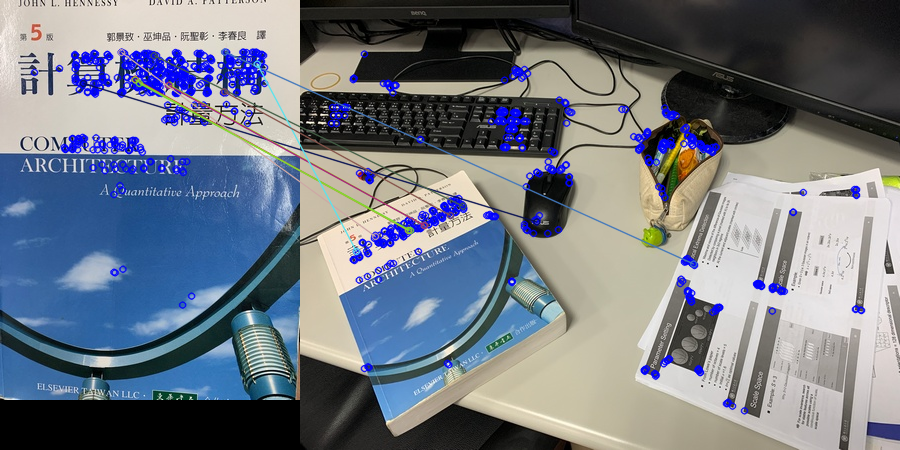

True

In [6]:
# Perform SIFT feature detection and description.
t1 = time.time()
orb = cv2.ORB_create()
kp0, des0 = orb.detectAndCompute(img0, None)
kp1, des1 = orb.detectAndCompute(img1, None)
t2 = time.time()
# Perform brute-force KNN matching.
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=False)
pairs_of_matches = bf.knnMatch(des0, des1, k=2)
t3 = time.time()

print('ORB use time:{} s'.format(t2-t1))
print('Brute Force matching use time:{} s'.format(t3-t2))

# Sort the pairs of matches by distance.
pairs_of_matches = sorted(pairs_of_matches, key=lambda x: x[0].distance)
# Set how many pair of matches will draw
if ENABLE_LIMIT_DRAWING_LINES_BEFORE_RATIO == True:
  limit_num = limit_draw_lines_before_ratio_test if (len(pairs_of_matches)>limit_draw_lines_before_ratio_test) else len(pairs_of_matches)
else:
  limit_num = len(pairs_of_matches)

# Draw the pairs of matches.(from best to worst)
img_pairs_of_matches = cv2.drawMatchesKnn(
    img0, kp0, img1, kp1, pairs_of_matches[:limit_num], img1,
    flags=cv2.DRAW_MATCHES_FLAGS_NOT_DRAW_SINGLE_POINTS)

# Show the pairs of matches.
print("below is before ratio test")
cv2_imshow(img_pairs_of_matches)
cv2.imwrite('/lab11/orb_before_ratio.jpg', img_pairs_of_matches)
# Apply the ratio test.
matches = [x[0] for x in pairs_of_matches
            if len(x) > 1 and x[0].distance < 0.8 * x[1].distance]
# Set how many pair of matches will draw(for ratio test)
if ENABLE_LIMIT_DRAWING_LINES_AFTER_RATIO == True:
  limit_num = limit_draw_lines_after_ratio_test if (len(matches)>limit_draw_lines_after_ratio_test) else len(matches)
else:
  limit_num = len(matches)


# Draw the pairs of matches.(from best to worst)(after ratio test)
img_matches = cv2.drawMatches(
    img0, kp0, img1, kp1, matches[:limit_num], img1,None,
        singlePointColor=(255, 0, 0),
        flags=0)

# Show the matches.
print("below is after ratio test")
cv2_imshow(img_matches)
cv2.imwrite('/lab11/orb_after_ratio.jpg', img_matches)

##A.<font color=red size=6>SURF with FLANN</font>

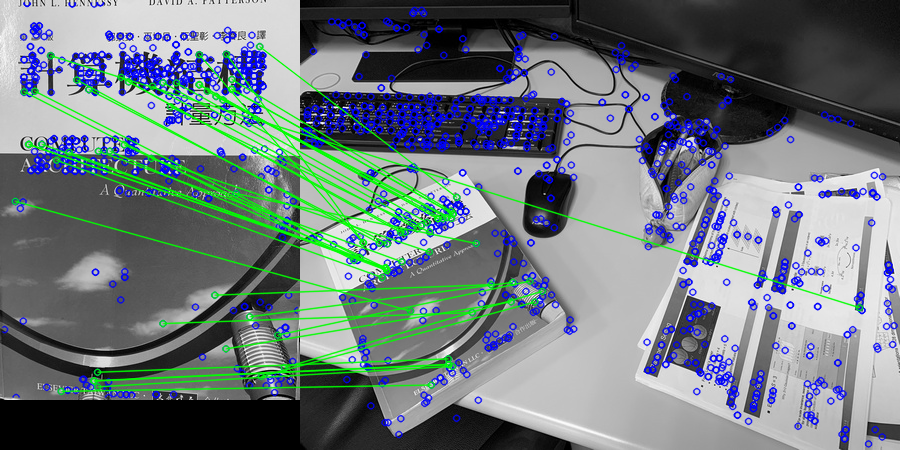

True

In [ ]:
img0 = cv2.imread('/lab11/images/book_0.JPG',
              cv2.IMREAD_GRAYSCALE)
img1 = cv2.imread('/lab11/images/book_1.JPG',
              cv2.IMREAD_GRAYSCALE)

# Perform SURF feature detection and description.
surf = cv2.xfeatures2d.SIFT_create()
kp0, des0 = surf.detectAndCompute(img0, None)
kp1, des1 = surf.detectAndCompute(img1, None)

# Define FLANN-based matching parameters.
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm=FLANN_INDEX_KDTREE, trees=5)
search_params = dict(checks=50)

# Perform FLANN-based matching.
flann = cv2.FlannBasedMatcher(index_params, search_params)
matches = flann.knnMatch(des0, des1, k=2)

# Prepare an empty mask to draw good matches.
mask_matches = [[0, 0] for i in range(len(matches))]

# Populate the mask based on David G. Lowe's ratio test.
for i, (m, n) in enumerate(matches):
  if m.distance < 0.7 * n.distance:
      mask_matches[i] = [1, 0]

# Draw the matches that passed the ratio test.
img_matches = cv2.drawMatchesKnn(
img0, kp0, img1, kp1, matches, None,
matchColor=(0, 255, 0), singlePointColor=(255, 0, 0),
matchesMask=mask_matches, flags=0)

# Show the matches.
cv2_imshow(img_matches)
cv2.imwrite('SIFT_with_FLANN.jpg', img_matches)


##B.<font color=red size=6>SURF with FLANN----bug</font>

In [ ]:
img0 = cv2.imread('/lab11/images/book_0.JPG',
              cv2.IMREAD_GRAYSCALE)
img1 = cv2.imread('/lab11/images/book_1.JPG',
              cv2.IMREAD_GRAYSCALE)

# Perform ORB feature detection and description.
orb = cv2.ORB_create()
kp0, des0 = orb.detectAndCompute(img0, None)
kp1, des1 = orb.detectAndCompute(img1, None)

# Define FLANN-based matching parameters.
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm=FLANN_INDEX_KDTREE, trees=5)
search_params = dict(checks=50)

# Perform FLANN-based matching.
flann = cv2.FlannBasedMatcher(index_params, search_params)
matches = flann.knnMatch(des0, des1, k=2)

# Prepare an empty mask to draw good matches.
mask_matches = [[0, 0] for i in range(len(matches))]

# Populate the mask based on David G. Lowe's ratio test.
for i, (m, n) in enumerate(matches):
  if m.distance < 0.7 * n.distance:
      mask_matches[i] = [1, 0]

# Draw the matches that passed the ratio test.
img_matches = cv2.drawMatchesKnn(
img0, kp0, img1, kp1, matches, None,
matchColor=(0, 255, 0), singlePointColor=(255, 0, 0),
matchesMask=mask_matches, flags=0)

# Show the matches.
cv2_imshow(img_matches)
cv2.imwrite('ORB_with_FLANN.jpg', img_matches)


error: ignored